zavrseno: {i}
zavrseno: {i}
zavrseno: {i}


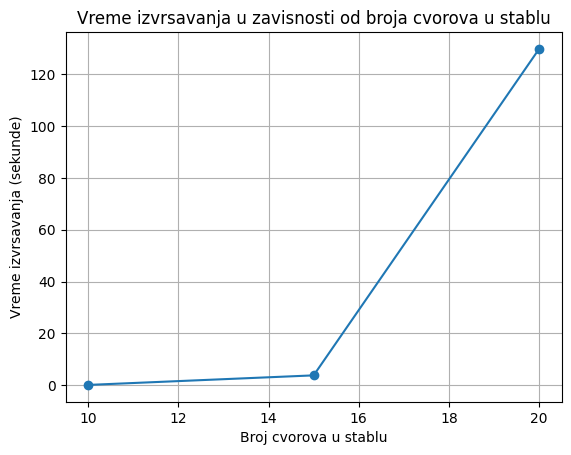

In [11]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
from itertools import combinations


def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False

def maximum_subforest_bf(T, H):
    max_subforest = None
    max_edges = 0

    for num_edges in range(len(T.edges()), 0, -1):
        for edges_subset in combinations(T.edges(), num_edges):
            subgraph = T.edge_subgraph(edges_subset).copy()
            if nx.is_connected(subgraph) and not contains_isomorphic_subtree(subgraph, H):
                if subgraph.number_of_edges() > max_edges:
                    max_edges = subgraph.number_of_edges()
                    max_subforest = subgraph
    
    return max_subforest







def generate_instance(N, num_of_subtrees):
    T = nx.random_tree(N)
    H = []
    nodes = list(T.nodes)

    for i in range(num_of_subtrees):
        subtree_nodes = random.sample(nodes, 10)
        subtree = T.subgraph(subtree_nodes).copy()
        if nx.is_connected(subtree):
            H.append(subtree)
    return T, H

def merenje_vremena(maximum_subforest_function, tree_sizes, num_of_subtrees):
    times = []
    i = 1
    for N in tree_sizes:
        T, H = generate_instance(N, num_of_subtrees)
        start = time.time()
        subforest = maximum_subforest_function(T, H)
        print("zavrseno: {i}")
        i = i+1
        end = time.time()

        time_elapsed = end - start
        times.append(time_elapsed)

    return times

tree_sizes = [10, 15, 20]
times = merenje_vremena(maximum_subforest_bf, tree_sizes, 5)

plt.plot(tree_sizes, times, marker='o')
plt.xlabel('Broj cvorova u stablu')
plt.ylabel('Vreme izvrsavanja (sekunde)')
plt.title('Vreme izvrsavanja u zavisnosti od broja cvorova u stablu')
plt.grid(True)
plt.show()



    